# Fully Connected NN

In [1]:
# Import io functions
from io_functions import *

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

In [2]:
# Get the datasets for the first time
#signal = get_dataset('/data/vlimant/LCD/Gamma100GeV')
#bkg = get_dataset('/data/vlimant/LCD/Pi0100GeV')

# Save the datasets for faster future loading
#save_dataset("/data/vlimant/LCD/Gamma100GeV", signal)
#save_dataset("/data/vlimant/LCD/Pi0100GeV", bkg)

In [3]:
# Load the datasets
#signal = load_dataset("/data/vlimant/LCD/Gamma100GeV")
#bkg = load_dataset("/data/vlimant/LCD/Pi0100GeV")

In [3]:
train_data, test_data, train_labels, test_labels = train_test(shape=(10000,), split=0.33)

## Prepare the data

In [4]:
# 1 is signal, 0 is background
#X = np.concatenate( (signal, bkg), axis=0 )
#Y = np.zeros( (len(X)) )
#Y[:len(signal)] = 1
#p = np.random.permutation(len(X))
#X = X[p]
#Y = Y[p]
#X = X.reshape((X.shape[0], 10000))

#train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.33, random_state=42)

## Create and train the model

In [4]:
# Construct and compile a network
model = Sequential()
model.add(Dense(1000, input_dim=10000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [10]:
# Train the network
my_fit = model.fit(train_data, train_labels, nb_epoch=10, batch_size=100, verbose=1)

Epoch 1/10
54236/54236 [==============================] - 4s - loss: 0.5639     
Epoch 2/10
54236/54236 [==============================] - 4s - loss: 0.4556     
Epoch 3/10
54236/54236 [==============================] - 4s - loss: 0.3874     
Epoch 4/10
54236/54236 [==============================] - 4s - loss: 0.3488     
Epoch 5/10
54236/54236 [==============================] - 4s - loss: 0.3307     
Epoch 6/10
54236/54236 [==============================] - 4s - loss: 0.3145     
Epoch 7/10
54236/54236 [==============================] - 4s - loss: 0.3056     
Epoch 8/10
54236/54236 [==============================] - 4s - loss: 0.2972     
Epoch 9/10
54236/54236 [==============================] - 4s - loss: 0.2915     
Epoch 10/10
54236/54236 [==============================] - 4s - loss: 0.2870     


## Visualize the classification

### Classification Histogram

In [6]:
from draw_functions import *

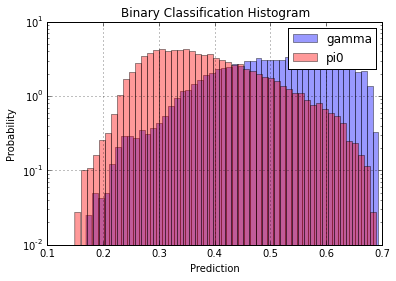

In [7]:
draw_histogram(train_data, train_labels, model)

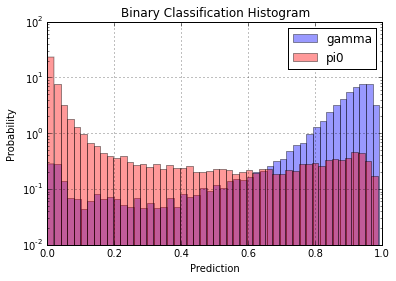

In [11]:
draw_histogram(train_data, train_labels, model)

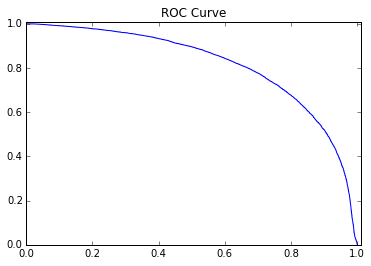

In [8]:
draw_roc_curve(test_data, test_labels, model)

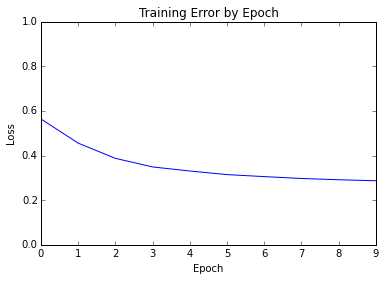

In [12]:
draw_loss_history(my_fit)